# Simple Linear Regression

In the Advertising.csv dataset:

We will investigate the relationship between TV and Sales.

Our goal is to model the relationship between TV budget and Sales using Linear Regression.

To do this, we will build a linear model.

## Steps:

1. [First, let's examine the raw data](#1)
1. [Let's import the data](#2)
1. [Let's examine the data (head, describe, info)](#3)
1. [Visualize the data](#4)
1. [Create the model (formulas)](#5)
1. [Preparation](#6)
1. [Train-Test Split](#7)
1. [Run Linear Regression Model (Fit)](#8)
1. [Calculating Coefficients (intercept_, coef_)](#9)
1. [Make a Predict](#10)
1. [Plot Actual Data and Prediction Data](#11)
1. [ Draw Errors ($y - \hat y$)](#12)
1. [Check Model Accuracy (RMSE, and $R^2$)](#13)
1. [Comments](#14)

<a id =1 ></a>
## 1- First, let's examine the raw data

### Manual data control:
* Which are the columns
* What is the Feature (X) and Label column?
* How many records are there in total?
* Is there any missing data?
 * NA (Not Available)
 * NaN: Not a Number

<a id =2></a>
## 2- Let's import the data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('/content/Advertising-checkpoint.csv', index_col=0)

<a id = 3></a>
## 3- Let's examine the data (head, describe, info)

In [3]:

df.head(10)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [4]:

df.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:

df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<a id = 4></a>
## 4- Visualize the data

In [7]:
#input output
data = df[['TV', 'sales']]

#input -> feature (X)
X = data['TV']

#output
y = data['sales']

In [8]:

type(X)

pandas.core.series.Series

In [9]:

type(y)

pandas.core.series.Series

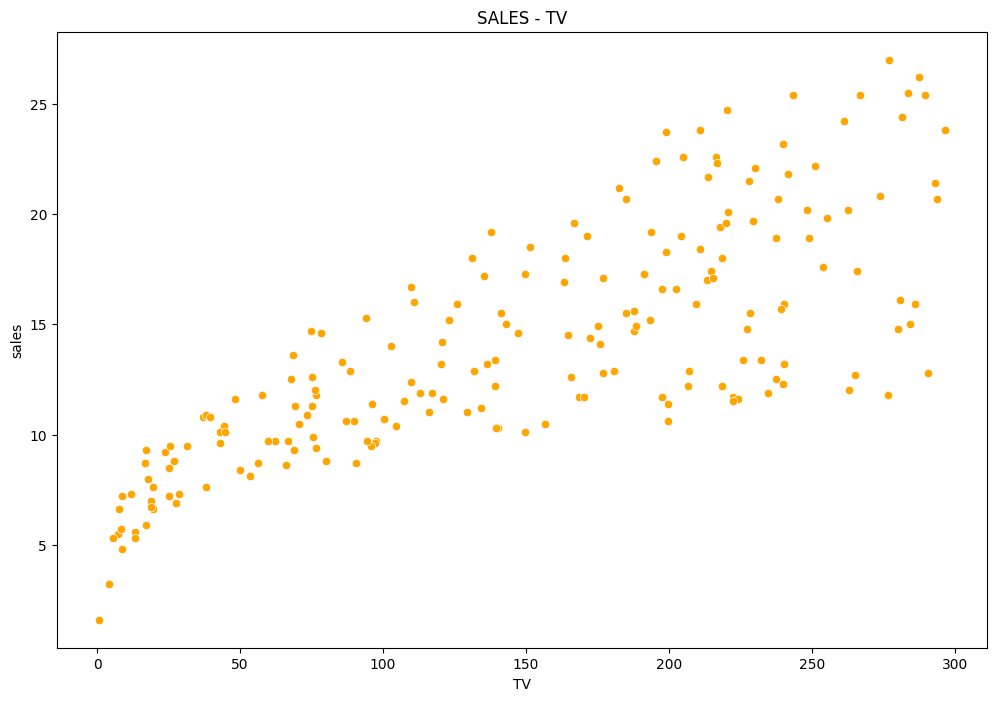

In [10]:
#grafik çiz

plt.figure(figsize=(12,8))

sns.scatterplot(data=data, x='TV', y='sales', color='orange')

plt.title('SALES - TV')
plt.show()

<a id =5 ></a>
## 5- Create the model (formulas)

$$ y = \beta_0 + \beta_1X $$

Machine Learning : Scikit Learn

`conda install -c anaconda scikit-learn`

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [11]:
#Sklearn Linear Regression
from sklearn.linear_model import LinearRegression

In [12]:
# Lineer Regresyon nesnesi için;
lr = LinearRegression

<a id =6 ></a>
## 6- Preparation

In [13]:
# once input ve output boyutlarına bakalım

print("X'in boyutu:", X.shape)
print("y'in boyutu:", y.shape)

X'in boyutu: (200,)
y'in boyutu: (200,)


In [14]:
# Sklearn LinearRegression class'ının istediği gibi değil
# yeniden boyutlandıralım
# (200,1) için
X = X.values.reshape(-1, 1)

In [15]:
#X in yeni boyutu
print("x'in boyutu:", X.shape)

x'in boyutu: (200, 1)


In [16]:
# label (output) degiskenini de yeniden boyutlandıralım
y = y.values.reshape(-1,1)

In [17]:
# y in yeni boyutu
print("y'in boyutu:", y.shape)

y'in boyutu: (200, 1)


<a id =7 ></a>
## 7- Train-Test Split

In [18]:
#scikit-learn import

from sklearn.model_selection import train_test_split

In [19]:
# train data
# X_train, y_train
# test_data
# X_test, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [20]:
#sekiller
print("X_train boyutu:", X_train.shape)
print("y_train boyutu:", y_train.shape)

print("X_test boyutu:", X_test.shape)
print("y_test boyutu:", y_test.shape)


X_train boyutu: (140, 1)
y_train boyutu: (140, 1)
X_test boyutu: (60, 1)
y_test boyutu: (60, 1)


In [21]:
#X_train tipi
type(X_train)

numpy.ndarray

<a id =8 ></a>
## 8- Run Linear Regression Model (Fit)

In [22]:
#regresyonu calistir -> fit
#fit -> ogrenme
#train data uzerinden

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

<a id =9 ></a>
## 9- Calculating Coefficients (intercept_, coef_)

Lineer Regresyonu fit etmenin amacı katsayıları hesaplamaktır.

$\beta_0$ -> intercept

$\beta_1$ -> slope (coefficient)

In [23]:
# intercept -> beta 0
print('intercept:', lr.intercept_)

intercept: [6.98966586]


In [24]:
# slope = coefficient -> beta 1
print('slope (coefficient) egim::', lr.coef_)

slope (coefficient) egim:: [[0.04649736]]


$$ y = 6.989 + 0.0464 X $$

<a id =10 ></a>
## 10- Make a Predict

In [25]:


y_pred = lr.predict(X_test)

In [26]:

y_pred

array([[ 7.35234526],
       [18.06533671],
       [13.27610876],
       [17.11214086],
       [18.22807747],
       [16.60531965],
       [13.4620982 ],
       [16.17754395],
       [17.05169429],
       [17.07029323],
       [12.4391563 ],
       [17.66080969],
       [ 9.60281742],
       [15.72186983],
       [11.04423554],
       [11.36971705],
       [13.95032046],
       [14.90351632],
       [14.59198401],
       [12.23921766],
       [16.97264878],
       [13.00642408],
       [16.07524976],
       [15.21969836],
       [15.58702749],
       [17.23303399],
       [17.20978531],
       [10.49091697],
       [15.58702749],
       [12.71349072],
       [10.1700852 ],
       [10.19798361],
       [12.61584627],
       [15.74976825],
       [ 9.31453379],
       [12.59259759],
       [11.50920913],
       [14.81982107],
       [17.33067844],
       [15.97295557],
       [17.00519693],
       [15.15925179],
       [14.63848137],
       [17.14933874],
       [12.57864838],
       [11

In [27]:


y_pred.shape

(60, 1)

In [28]:


y_test.shape

(60, 1)

<a id =11 ></a>
## 11- Make a Predict

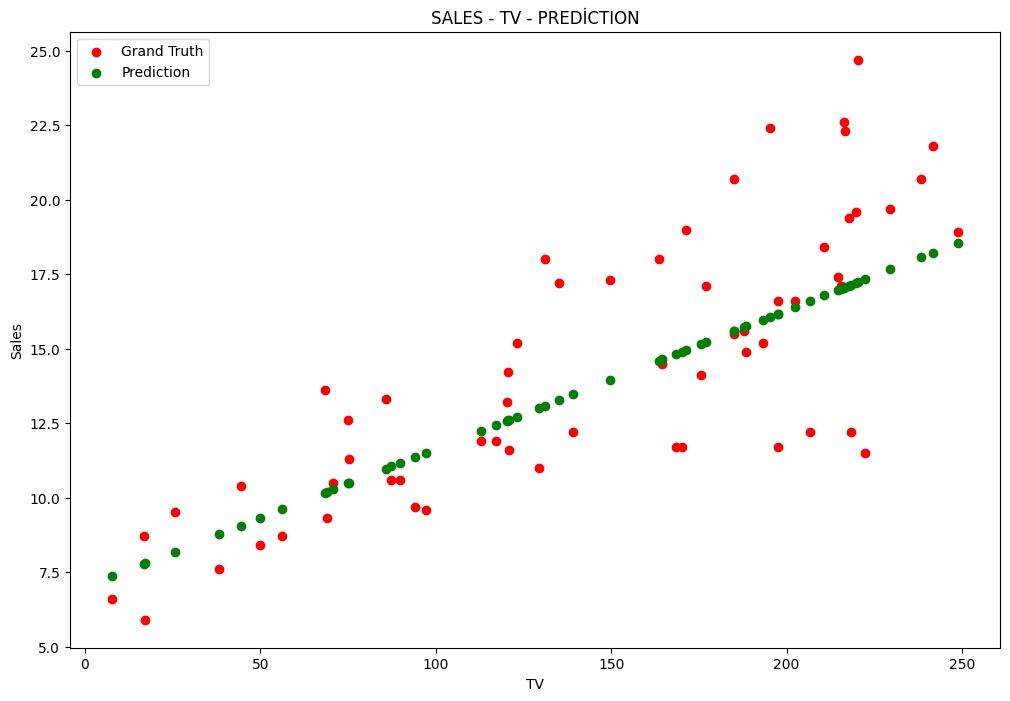

In [29]:

fix,ax = plt.subplots(figsize = (12,8))
ax.scatter(X_test, y_test, label='Grand Truth', color='red')


ax.scatter(X_test, y_pred, label='Prediction', color='green')

plt.title('SALES - TV - PREDİCTION')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend(loc='upper left')
plt.show()

In [30]:

y_test[0:10]

array([[ 6.6],
       [20.7],
       [17.2],
       [19.4],
       [21.8],
       [12.2],
       [12.2],
       [11.7],
       [22.6],
       [22.3]])

In [31]:

y_pred[0:10]

array([[ 7.35234526],
       [18.06533671],
       [13.27610876],
       [17.11214086],
       [18.22807747],
       [16.60531965],
       [13.4620982 ],
       [16.17754395],
       [17.05169429],
       [17.07029323]])

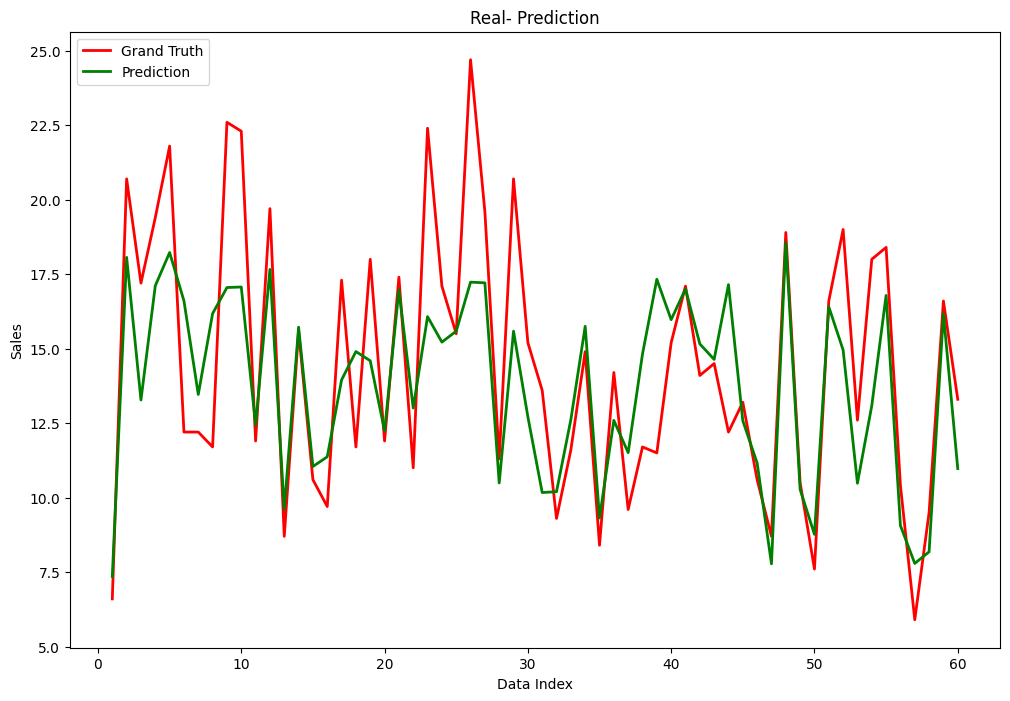

In [32]:
# Her bir tahmin noktasindaki degisimi gorelim
indexler = range(1,61)

#Gercek Veri -> Grand Truth
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test, label='Grand Truth', color='red', linewidth=2)

#Tahmin -> Prediction
ax.plot(indexler, y_pred, label='Prediction', color='green', linewidth=2)

plt.title('Real- Prediction')
plt.xlabel('Data Index')
plt.ylabel('Sales')
plt.legend(loc='upper left')
plt.show()

<a id =12 ></a>
## 12- Draw Errors ( 𝑦−𝑦̂ )

Err : Residual -> ($y - \hat y$)

**y_test - y_pred**

In [33]:
import numpy as np

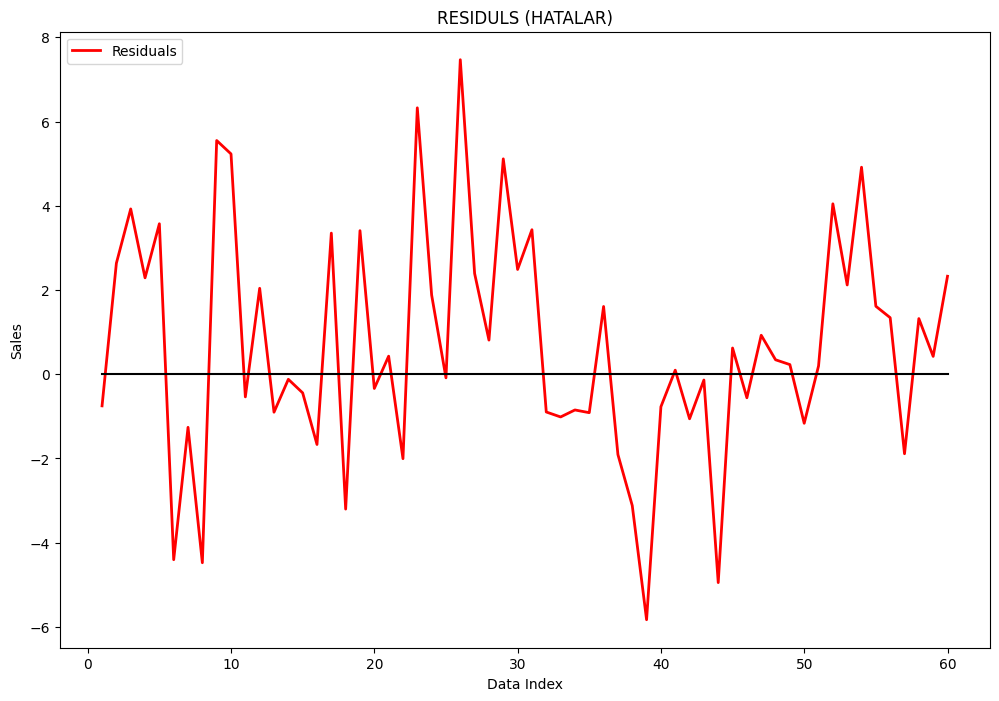

In [34]:

indexler = range(1,61)

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(indexler, y_test - y_pred, label='Residuals', color='red', linewidth=2)

ax.plot(indexler, np.zeros(60), color='black')

plt.title('RESIDULS (HATALAR)')
plt.xlabel('Data Index')
plt.ylabel('Sales')
plt.legend(loc='upper left')
plt.show()

<a id =13 ></a>
## 13- Check Model Accuracy (RMSE and  𝑅2)

**RMSE**: Root Mean Squared Error (MSE'nin karekökü)

$R^2$: `coefficient of determination`.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [35]:
from sklearn.metrics import r2_score, mean_squared_error

In [36]:
# R^2 yi hesapla
r_2 = r2_score(y_test, y_pred)

In [37]:
print('R^2:', r_2)

R^2: 0.5942987267783302


In [38]:
# % R^2

print('R^2 %:', r_2 * 100)

R^2 %: 59.42987267783302


In [39]:
# MSE -> RMSE

mse = mean_squared_error(y_test, y_pred)

In [40]:
print('MSE:', mse)

MSE: 7.975798532854851


In [41]:
# RMSE
import math
rmse = math.sqrt(mse)

In [42]:
print('RMSE:', rmse)

RMSE: 2.8241456288327007


<a id =14 ></a>
## 14- Comments

**$R^2$ = %59.43**
